# Task 4: Following the above task 3, doing the t-SNE analysis on the BBBP training dataset of HW5 by using Morgan fingerprints as features and two different colors to represent each molecule’s target class.  And compare the resulting visualizations by A). using PCA to reduce to two dimensions; B). Trying PCA first to reduce  the dataset’s dimensionality, with an explained variance ratio of 95% and then t-SNE .  C). Trying PCA first to reduce  the dataset’s dimensionality, with an explained variance ratio of 75% and then t-SNE.

In [1]:
!pip install scikit-learn
!pip install rdkit-pypi

  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached rdkit_pypi-2022.9.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (29.4 MB)


In [2]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# read BBBP.csv file
df = pd.read_csv('BBBP.csv')
df.head()

,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...


In [3]:
# define function to calculate morgan fingerprints
Morgan_fpts = []
p_np = []
for i in range(len(df)):
    mol = Chem.MolFromSmiles(df['smiles'][i])
    if mol != None:
        Morgan_fpts.append(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024))
        p_np.append(df['p_np'][i])

[15:30:51] Explicit valence for atom # 1 N, 4, is greater than permitted
[15:30:51] WARNING: not removing hydrogen atom without neighbors
[15:30:51] Explicit valence for atom # 6 N, 4, is greater than permitted
[15:30:51] WARNING: not removing hydrogen atom without neighbors
[15:30:51] WARNING: not removing hydrogen atom without neighbors
[15:30:51] WARNING: not removing hydrogen atom without neighbors
[15:30:51] WARNING: not removing hydrogen atom without neighbors
[15:30:51] WARNING: not removing hydrogen atom without neighbors
[15:30:51] WARNING: not removing hydrogen atom without neighbors
[15:30:51] Explicit valence for atom # 6 N, 4, is greater than permitted
[15:30:51] WARNING: not removing hydrogen atom without neighbors
[15:30:51] WARNING: not removing hydrogen atom without neighbors
[15:30:51] WARNING: not removing hydrogen atom without neighbors
[15:30:51] WARNING: not removing hydrogen atom without neighbors
[15:30:51] Explicit valence for atom # 11 N, 4, is greater than pe

In [4]:
# convert fingerprints to numpy array
Morgan_fpts = np.array(Morgan_fpts)

# convert p_np to numpy array
p_np = np.array(p_np)

In [5]:
# perform t-SNE on Morgan fingerprints
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', learning_rate='auto',
            random_state=42)
X_reduced = tsne.fit_transform(Morgan_fpts)

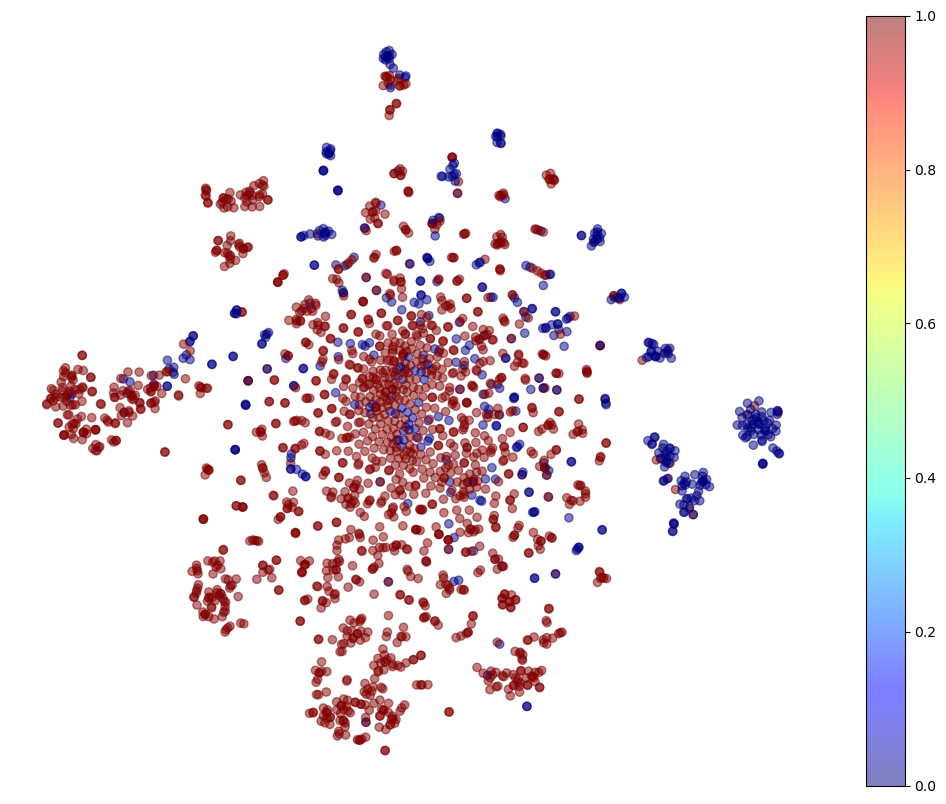

In [6]:
# plot the dataset
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=p_np.astype(np.int8), cmap='jet', alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

# The target classes seem to be fairly well-separated.

# A: Using PCA to reduce to two dimensions

In [7]:
# perform PCA on Morgan fingerprints, reduce to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(Morgan_fpts)

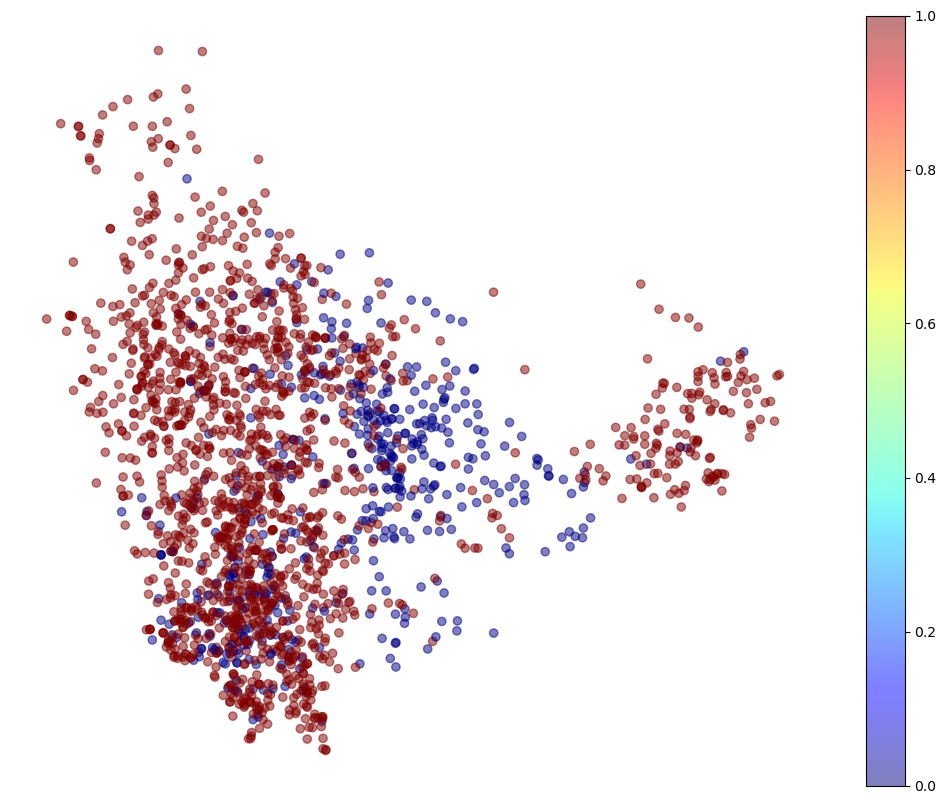

In [8]:
# plot the dataset
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=p_np.astype(np.int8), cmap='jet', alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

# With PCA, the target classes are not as separated as using t-SNE.

# B: Trying PCA first to reduce the dataset’s dimensionality, with an explained variance ratio of 95% and then t-SNE .

In [9]:
# perform PCA on Morgan fingerprints, reduce dimensionality with explained variance of 95%
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(Morgan_fpts)

# perform t-SNE on Morgan fingerprints
tsne = TSNE(n_components=2, init='random', learning_rate='auto',
            random_state=42)
X_reduced = tsne.fit_transform(X_reduced)

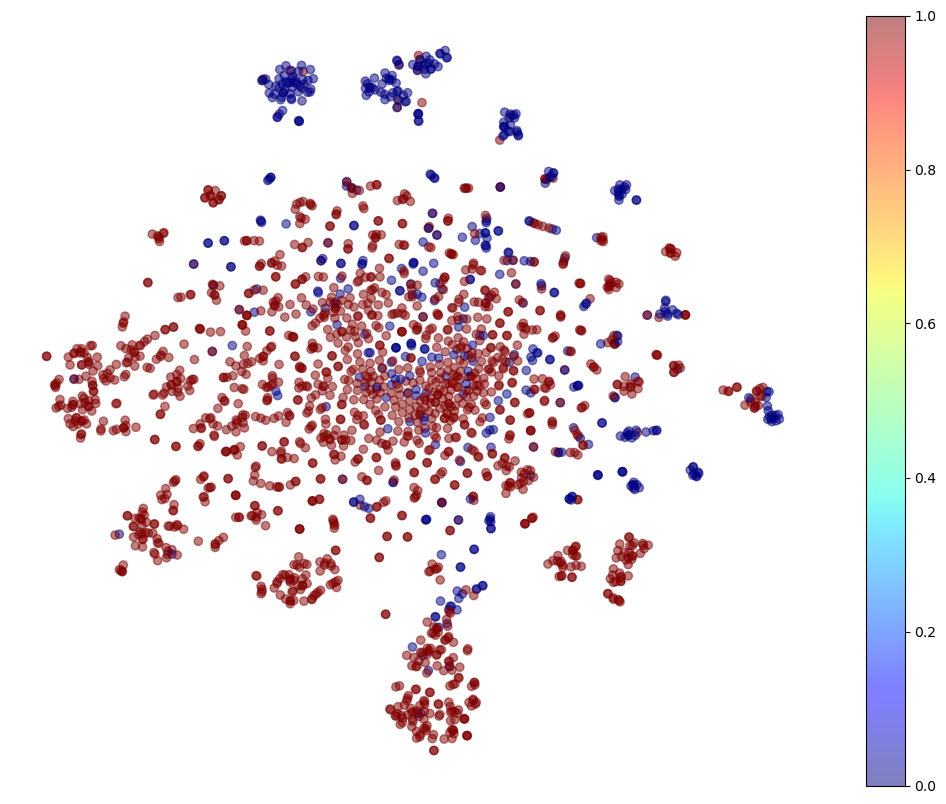

In [10]:
# plot the dataset
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=p_np.astype(np.int8), cmap='jet', alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

# PCA reduced dimensionality with 0.95 explained variance ratio followed by t-SNE to 2D developed a slightly better separation compared to just t-SNE.

# C: Trying PCA first to reduce the dataset’s dimensionality, with an explained variance ratio of 75% and then t-SNE.

In [11]:
# perform PCA on Morgan fingerprints, reduce dimensionality with explained variance of 75%
pca = PCA(n_components=0.75)
X_reduced = pca.fit_transform(Morgan_fpts)

# perform t-SNE on Morgan fingerprints
tsne = TSNE(n_components=2, init='random', learning_rate='auto',
            random_state=42)
X_reduced = tsne.fit_transform(X_reduced)

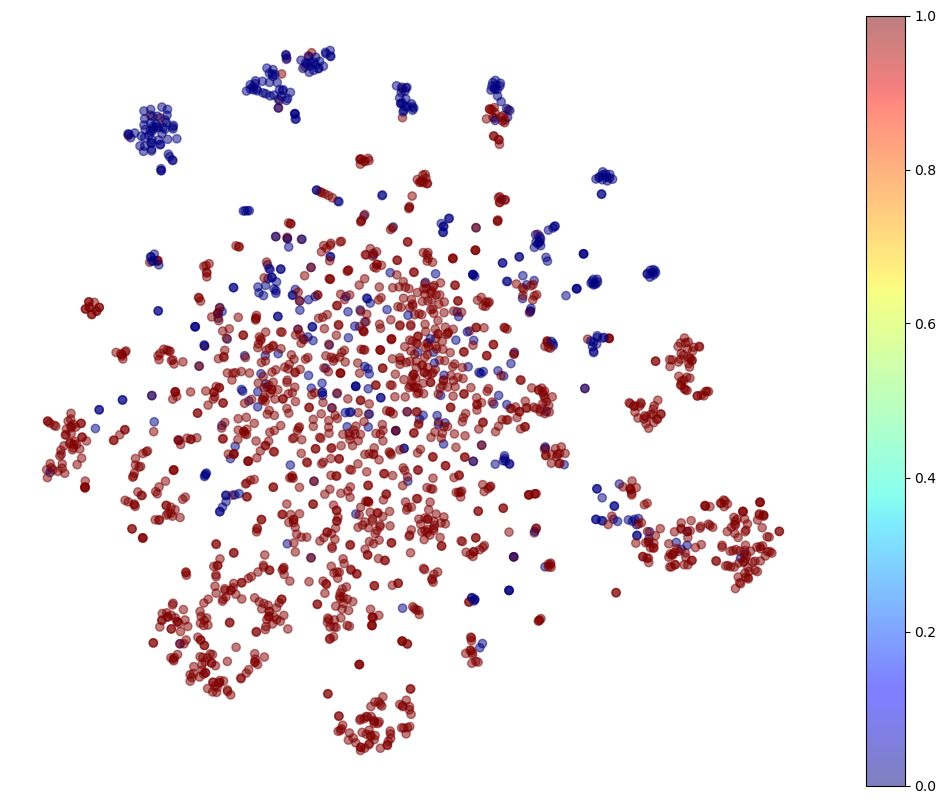

In [12]:
# plot the dataset
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=p_np.astype(np.int8), cmap='jet', alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

# Separation of the two target classes more or less similar with performing PCA with reducing dimensionality with explained variance ratio of 95% followed by t-SNE.